<a href="https://colab.research.google.com/github/YunhoCha/Lec5/blob/main/hursoo_Lec5_9_10_pynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 5강. 실전, 데이터 분석¶
- 셋째마당 (09장)
- pp.222-275


## 9. 한국복지패널 데이터 분석

In [2]:
# 그래프 해상도 설정
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.dpi' : '100'})
%config InlineBackend.figure_format = 'retina'

In [3]:
# Koweps_hpwc14_2019_beta2.sav 파일 다운로드 -> 워킹 디렉터리
# 2020년 발간. 6,331가구, 14,418명 정보
# 데이터 분비

# pyreadstat 이란
pyreadstat 패키지는 Python에서 SPSS, SAS, 그리고 Stata와 같은 통계 소프트웨어 파일 형식을 읽고 쓸 수 있게 해주는 라이브러리입니다. 이 패키지는 ReadStat C 라이브러리를 기반으로 하며, .sav, .zsav, .dta, .sas7bdat, .xpt 파일 형식과 같은 데이터 파일을 처리할 수 있습니다. 사용자는 이를 통해 데이터 분석, 데이터 처리, 머신러닝 프로젝트 등에서 필요한 데이터를 더 쉽게 불러오고, Python 환경에서 직접 작업할 수 있습니다.

주요 기능은 다음과 같습니다:

SPSS, SAS, Stata 파일의 읽기와 쓰기 지원
메타데이터 정보(변수 라벨, 값 라벨 등)의 접근
파일 내 데이터를 pandas DataFrame으로 쉽게 변환
pyreadstat를 사용하면, 데이터 과학자나 연구원들이 다양한 데이터 소스로부터 정보를 추출하고, 이를 분석하는데 필요한 전처리 작업을 용이하게 할 수 있습니다. Python 환경 내에서 데이터를 효율적으로 처리하고 분석하기 위한 필수 도구 중 하나입니다.


In [6]:
pip install pyreadstat

  Using cached pyreadstat-1.2.6-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (2.8 MB)


In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import pyreadstat

In [11]:
# 데이터 불러오기
raw_welfare = pd.read_spss('Koweps_hpwc14_2019_beta2.sav')

# 복사본 만들기
welfare = raw_welfare.copy()

# 데이터 검토
welfare

,h14_id,h14_ind,h14_sn,h14_merkey,h_new,h14_cobf,p14_wsc,p14_wsl,p14_wgc,p14_wgl,...,wc14_64,wc14_65,wc14_5aq4,wc14_5aq5,wc14_5aq6,h14_pers_income1,h14_pers_income2,h14_pers_income3,h14_pers_income4,h14_pers_income5
0,2.0,1.0,1.0,20101.0,0.0,NaN,0.291589,0.291589,1307.764781,1307.764781,...,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
1,3.0,1.0,1.0,30101.0,0.0,NaN,0.419753,0.419753,1882.570960,1882.570960,...,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
2,4.0,1.0,1.0,40101.0,0.0,NaN,0.265263,0.265980,1189.691668,1192.908537,...,NaN,,NaN,NaN,NaN,NaN,1284.0,NaN,0.0,NaN
3,6.0,1.0,1.0,60101.0,0.0,NaN,0.494906,0.495941,2219.630833,2224.273816,...,1.0,.,2.0,4.0,4.0,2304.0,NaN,1800.0,0.0,NaN
4,6.0,1.0,1.0,60101.0,0.0,NaN,1.017935,1.017935,4565.389177,4565.389177,...,1.0,.,1.0,5.0,2.0,NaN,NaN,NaN,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14413,9800.0,7.0,1.0,98000701.0,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
14414,9800.0,7.0,1.0,98000701.0,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
14415,9800.0,7.0,1.0,98000701.0,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,,NaN,NaN,NaN,NaN,208.0,NaN,0.0,NaN
14416,9800.0,7.0,1.0,98000701.0,1.0,NaN,NaN,NaN,NaN,NaN,...,5.0,.,4.0,3.0,3.0,NaN,1200.0,NaN,0.0,NaN


In [12]:
welfare.shape

(14418, 830)

In [13]:
welfare.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14418 entries, 0 to 14417
Columns: 830 entries, h14_id to h14_pers_income5
dtypes: float64(826), object(4)
memory usage: 91.3+ MB


In [14]:
welfare.describe()

,h14_id,h14_ind,h14_sn,h14_merkey,h_new,h14_cobf,p14_wsc,p14_wsl,p14_wgc,p14_wgl,...,wc14_63,wc14_64,wc14_5aq4,wc14_5aq5,wc14_5aq6,h14_pers_income1,h14_pers_income2,h14_pers_income3,h14_pers_income4,h14_pers_income5
count,14418.000000,14418.000000,14418.000000,1.441800e+04,14418.000000,121.000000,11513.000000,11513.000000,11513.000000,11513.000000,...,2027.000000,2027.000000,2027.000000,2027.000000,2027.000000,2659.000000,3331.000000,989.000000,14418.000000,715.000000
mean,4672.108406,3.121723,1.004855,4.672140e+07,0.201484,2.256198,1.000000,1.000000,4484.952219,4484.952541,...,3.211643,3.743957,3.513567,4.100641,3.233350,4141.380594,1389.440408,3457.835187,2.038702,1183.292308
std,2792.998128,3.297963,0.143205,2.793014e+07,0.401123,1.675952,0.906021,1.016782,4063.459773,4560.218659,...,2.174768,3.138629,1.045929,0.937712,1.289456,2583.755449,1211.910836,6619.516319,32.965477,2147.418274
min,2.000000,1.000000,1.000000,2.010100e+04,0.000000,1.000000,0.001998,0.000000,8.960093,0.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,-47000.000000,0.000000,-10600.000000
25%,2356.000000,1.000000,1.000000,2.356030e+07,0.000000,1.000000,0.341814,0.269286,1533.021553,1207.736094,...,1.000000,2.000000,3.000000,4.000000,2.000000,2448.000000,391.500000,1000.000000,0.000000,206.000000
50%,4535.000000,1.000000,1.000000,4.535010e+07,0.000000,2.000000,0.726304,0.704045,3257.436901,3157.609630,...,3.000000,3.000000,4.000000,4.000000,3.000000,3540.000000,1116.000000,2498.000000,0.000000,530.000000
75%,6616.000000,7.000000,1.000000,6.616010e+07,0.000000,2.000000,1.366071,1.390045,6126.762919,6234.287538,...,5.000000,5.000000,4.000000,5.000000,4.000000,5378.500000,2040.000000,4687.000000,0.000000,1295.000000
max,9800.000000,14.000000,9.000000,9.800070e+07,1.000000,7.000000,4.727006,5.790039,21200.393903,25968.049029,...,9.000000,99.000000,9.000000,9.000000,9.000000,22700.000000,11500.000000,170000.000000,3000.000000,22644.000000


In [15]:
# 열 이름 변경
welfare = welfare.rename(columns = {'h14_g3'     : 'sex',            #  성별
                                    'h14_g4'     : 'birth',          #  태어난 연도
                                    'h14_g10'    : 'marriage_type',  #  혼인 상태
                                    'h14_g11'    : 'religion',       #  종교
                                    'p1402_8aq1' : 'income',         #  월급
                                    'h14_eco9'   : 'code_job',       #  직업 코드
                                    'h14_reg7'   : 'code_region'})   #  지역 코드

# 성별에 따른 월급 차이 - 성별에 따라 월급이 다를까? (229-234쪽)

In [ ]:
### 성별 변수 검토 및 전처리하기(229쪽)

In [17]:
welfare['sex'].dtypes # 변수 타입 출력

dtype('float64')

In [18]:
welfare['sex'].value_counts() # 빈도 구하기

2.0    7913
1.0    6505
Name: sex, dtype: int64

In [19]:
# 이상치 결측 처리
welfare['sex'] = np.where(welfare['sex'] == 9, np.nan, welfare['sex'])

# 결측치 확인
welfare['sex'].isna().sum()

0

In [20]:
# 성별 항목 이름 부여
welfare['sex'] = np.where(welfare['sex'] == 1, 'male', 'female')

# 빈도 구하기
welfare['sex'].value_counts()

female    7913
male      6505
Name: sex, dtype: int64

<ipython-input-24-ec24e31642e1>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = welfare, x = 'sex', palette=['skyblue', 'orange'])


<Axes: xlabel='sex', ylabel='count'>

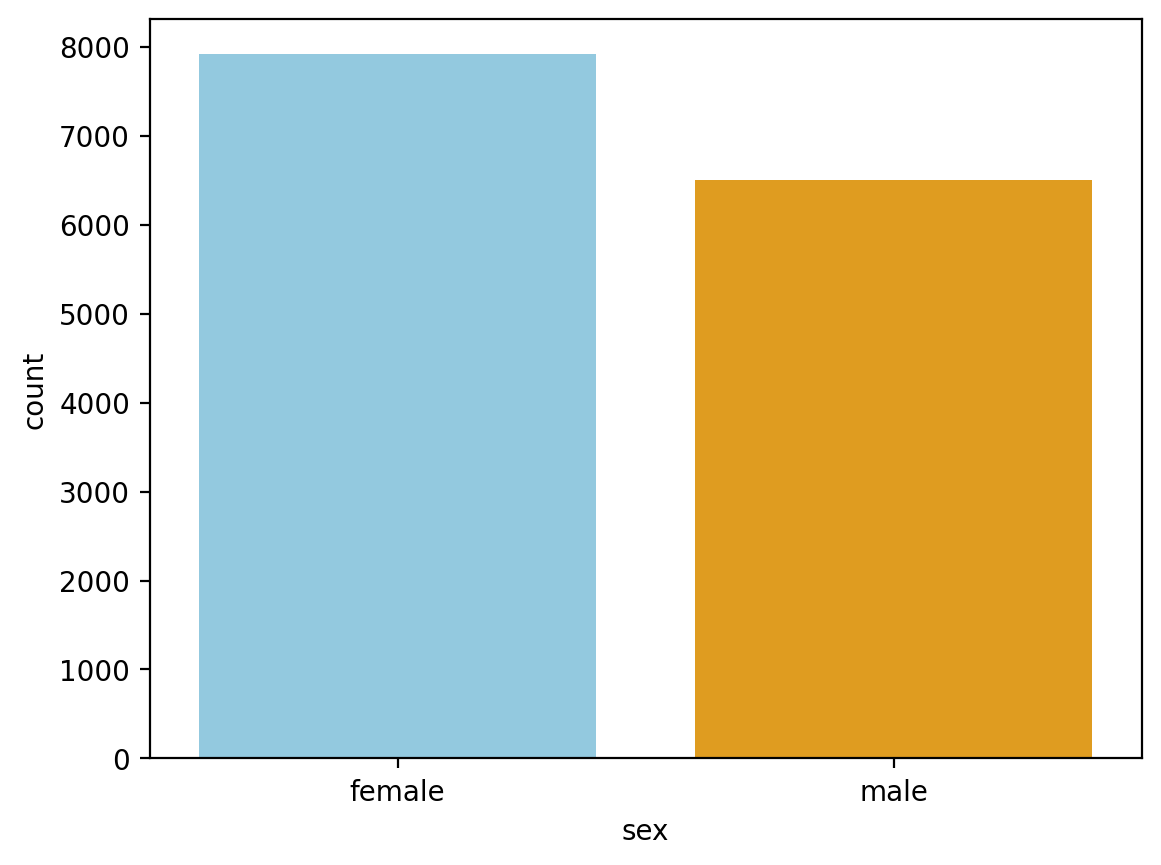

In [24]:
# 빈도 막대 그래프 만들기
sns.countplot(data = welfare, x = 'sex', palette=['skyblue', 'orange'])

### [Do it! 실습] 월급 변수 검토 및 전처리하기(231쪽)

In [25]:
welfare['income'].dtypes

dtype('float64')

In [26]:
welfare['income'].describe()

count    4534.000000
mean      268.455007
std       198.021206
min         0.000000
25%       150.000000
50%       220.000000
75%       345.750000
max      1892.000000
Name: income, dtype: float64

<Axes: xlabel='income', ylabel='Count'>

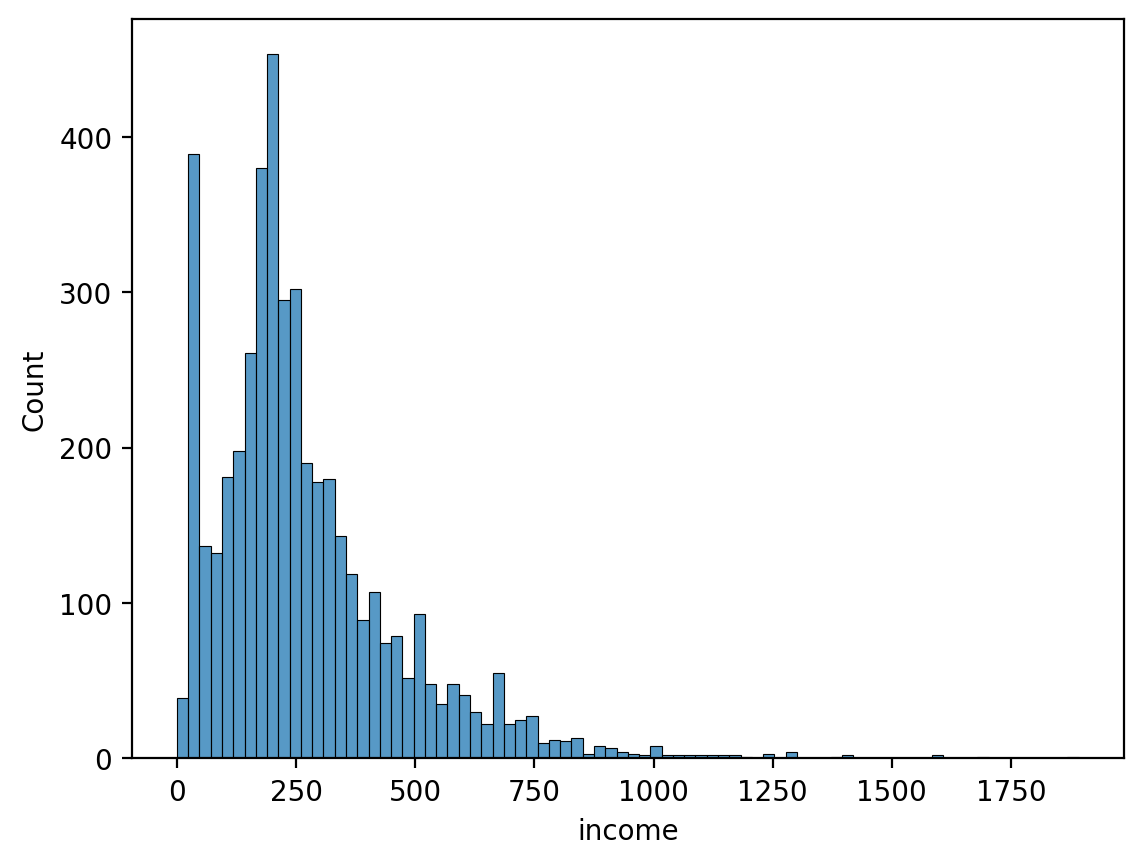

In [27]:
sns.histplot(data = welfare, x = 'income')

In [28]:
welfare['income'].isna().sum()

9884

In [29]:
# 이상치 결측 처리
welfare['income'] = np.where(welfare['income'] == 9999, np.nan, welfare['income'])

# 결측치 확인
welfare['income'].isna().sum()

9884

### [Do it! 실습] 성별에 따른 월급 차이 분석하기(234쪽)

In [30]:
sex_income = welfare.groupby('sex', as_index = False) \
                    .agg(mean_income = ('income', 'mean'))
sex_income

,sex,mean_income
0,female,186.293096
1,male,349.037571


<Axes: xlabel='sex', ylabel='mean_income'>

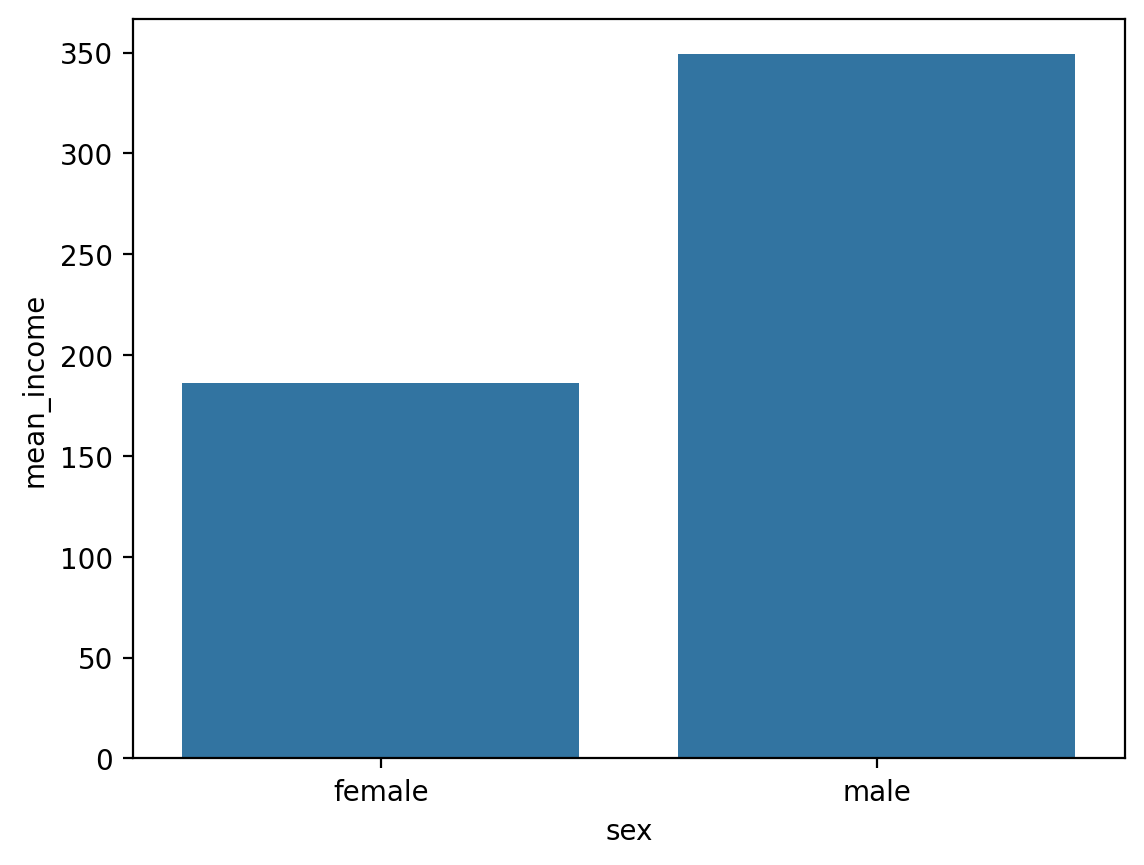

In [31]:
sns.barplot(data = sex_income, x = 'sex', y = 'mean_income')

# 10. 텍스트 마이닝
## 10-1 대통령 연설문 텍스트 마이닝

In [34]:
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.tag import pos_tag
from nltk.chunk import ne_chunk
from nltk.corpus import wordnet as wn

# 필요한 NLTK 데이터를 다운로드합니다. 이미 설치되어 있다면 이 단계는 생략 가능합니다.
# nltk.download('punkt')
# nltk.download('averaged_perceptron_tagger')
# nltk.download('maxent_ne_chunker')
# nltk.download('words')

In [50]:
moon = open('Third Inaugural Address.txt', encoding = 'UTF-8').read()
moon = moon.lower()
moon
# 데이터 확인하기#

'january 20, 1941\non each national day of inauguration since 1789, the people have renewed their sense of dedication to the united states.\n\nin washington\'s day the task of the people was to create and weld together a nation.\n\nin lincoln\'s day the task of the people was to preserve that nation from disruption from within.\n\nin this day the task of the people is to save that nation and its institutions from disruption from without.\n\nto us there has come a time, in the midst of swift happenings, to pause for a moment and take stock- to recall what our place in history has been, and to rediscover what we are and what we may be. if we do not, we risk the real peril of isolation, the real peril of inaction.\n\nlives of nations are determined not by the count of years, but by the lifetime of the human spirit. the life of a man is threescore years and ten: a little more, a little less. the life of a nation is the fullness of the measure of its will to live.\n\nthere are men who doubt

In [51]:
# 불필요한 문자 제거하기
import re
moon = re.sub(r'[\,\n]', ' ', moon)
moon

'january 20  1941 on each national day of inauguration since 1789  the people have renewed their sense of dedication to the united states.  in washington\'s day the task of the people was to create and weld together a nation.  in lincoln\'s day the task of the people was to preserve that nation from disruption from within.  in this day the task of the people is to save that nation and its institutions from disruption from without.  to us there has come a time  in the midst of swift happenings  to pause for a moment and take stock- to recall what our place in history has been  and to rediscover what we are and what we may be. if we do not  we risk the real peril of isolation  the real peril of inaction.  lives of nations are determined not by the count of years  but by the lifetime of the human spirit. the life of a man is threescore years and ten: a little more  a little less. the life of a nation is the fullness of the measure of its will to live.  there are men who doubt this. there 

In [52]:
# punkt 토크나이저 다운로드
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

# 명사 추출하기
def extract_nouns(text):
    # 텍스트를 토큰화
    tokens = word_tokenize(text)

    # 토큰에 품사 태깅
    tagged_tokens = pos_tag(tokens)

    # 명사(NN, NNS)와 고유명사(NNP, NNPS)만을 선택하여 리스트로 반환
    nouns = [word for word, tag in tagged_tokens if tag in ('NN', 'NNS', 'NNP', 'NNPS')]
    return nouns

token = extract_nouns(moon)
token

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


['day',
 'inauguration',
 'people',
 'sense',
 'dedication',
 'states',
 'washington',
 'day',
 'task',
 'people',
 'nation',
 'lincoln',
 'day',
 'task',
 'people',
 'nation',
 'disruption',
 'day',
 'task',
 'people',
 'nation',
 'institutions',
 'disruption',
 'time',
 'midst',
 'happenings',
 'moment',
 'stock-',
 'place',
 'history',
 'peril',
 'isolation',
 'peril',
 'inaction',
 'lives',
 'nations',
 'count',
 'years',
 'lifetime',
 'spirit',
 'life',
 'man',
 'years',
 'ten',
 'life',
 'nation',
 'fullness',
 'measure',
 'men',
 'men',
 'democracy',
 'form',
 'government',
 'frame',
 'life',
 'kind',
 'fate',
 'reason',
 'tyranny',
 'slavery',
 'wave',
 'future—and',
 'freedom',
 'tide',
 'americans',
 'years',
 'life',
 'republic',
 'terror',
 'midst',
 'shock—but',
 'years',
 'years',
 'people',
 'democracy',
 'security',
 'i',
 'understanding',
 'life',
 'ideals',
 'things',
 'future',
 'experience',
 'democracy',
 'crisis',
 'home',
 'things',
 'structures',
 'lines',
 'fac

In [53]:
# 데이터 프레임으로 변환
import pandas as pd
df_word = pd.DataFrame({'word' : token})
df_word

,word
0,day
1,inauguration
2,people
3,sense
4,dedication
...,...
295,america
296,americans
297,service
298,country


In [55]:
## 단어 빈도 구하기

# 단어별 분리
# 빈도 구하기
# 내림차순 정렬
df_word = df_word.groupby('word', as_index = False) \
                 .agg(n = ('word', 'count')) \
                 .sort_values('n', ascending = False)
df_word

,word,n
115,nation,12
37,democracy,9
95,life,8
4,america,7
156,spirit,7
...,...,...
73,hemisphere,1
75,home,1
77,i,1
78,ideal,1


In [56]:
# 단어 빈도 상위 20개 추출
top20 = df_word.head(20)
top20

,word,n
115,nation,12
37,democracy,9
95,life,8
4,america,7
156,spirit,7
121,people,6
60,freedom,6
193,years,5
31,day,5
107,men,5


<ipython-input-58-9023ce2fb1be>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = top20, y = 'word', x = 'n', palette='hls')


<Axes: xlabel='n', ylabel='word'>

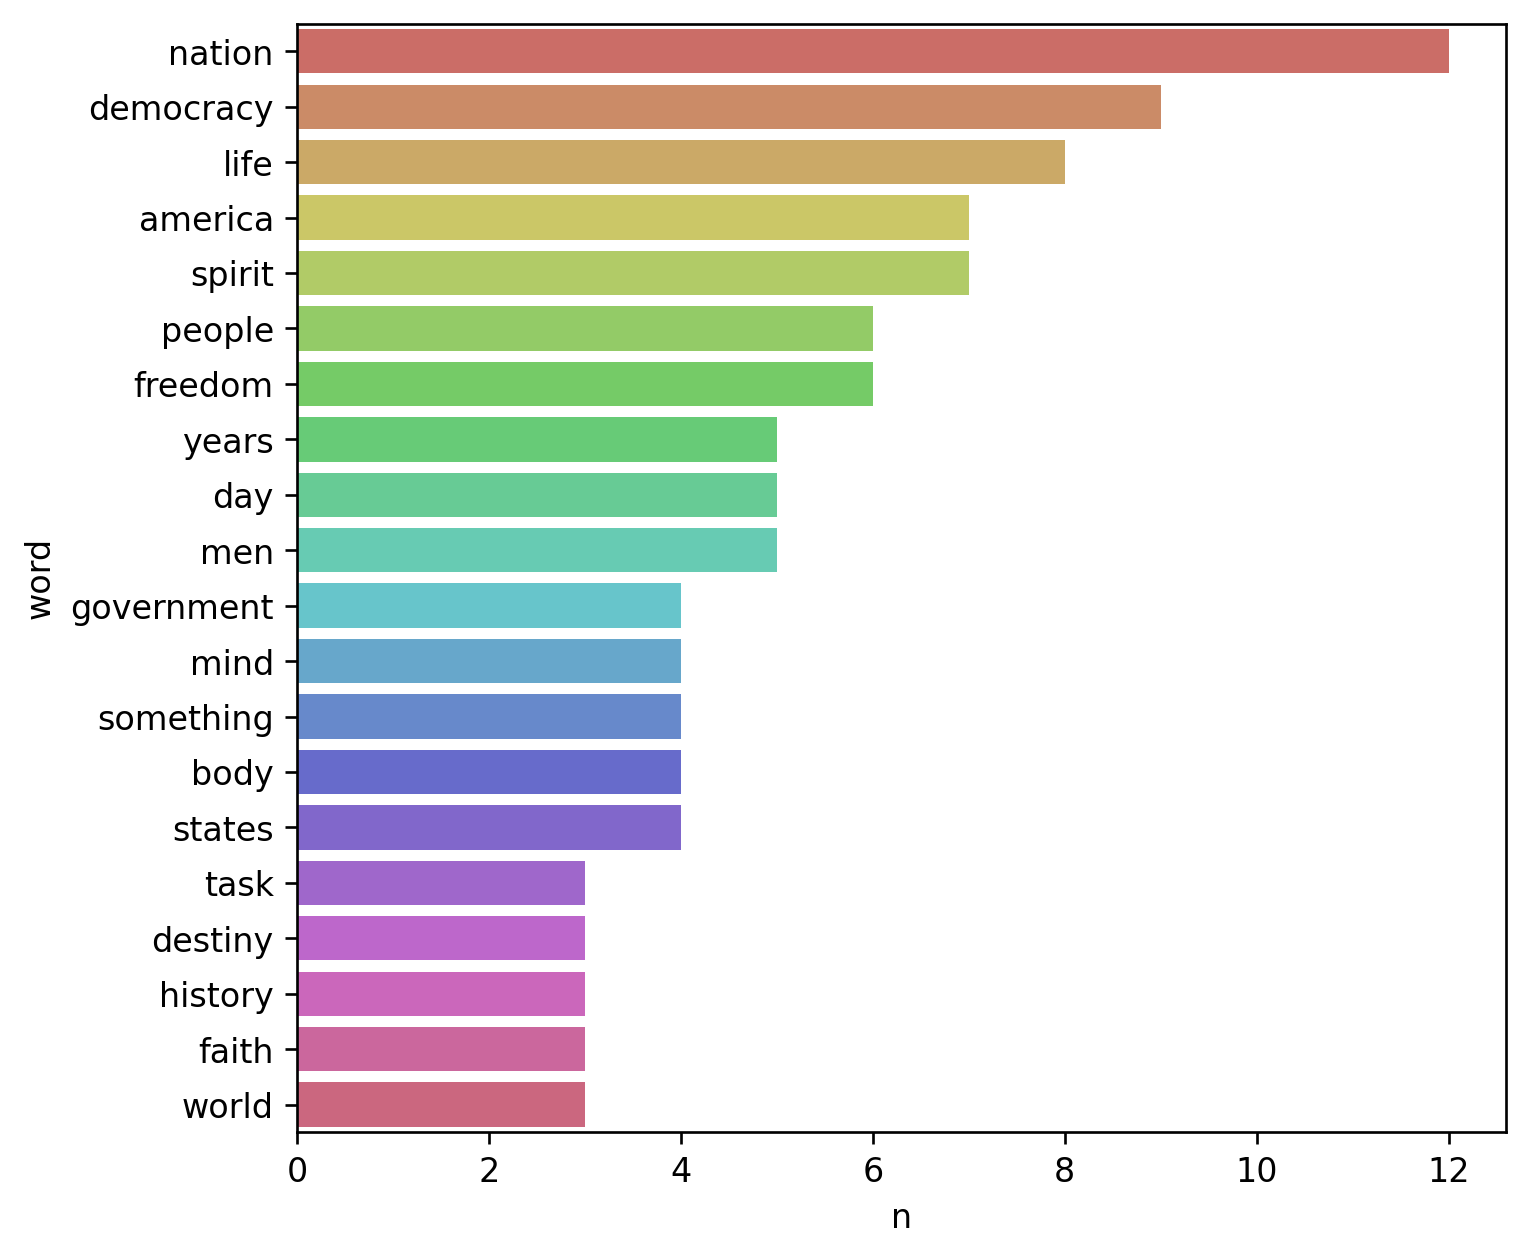

In [58]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams.update({'font.family'    : 'Malgun Gothic',  # 한글 폰트 설정
                     'figure.dpi'     : '120',            # 해상도 설정
                     'figure.figsize' : [6.5, 6]})        # 가로 세로 크기 설정

# 막대 그래프 만들기
sns.barplot(data = top20, y = 'word', x = 'n', palette='hls')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')